**Credit:**  Adapted from CS161-MIT (originally developed by Mary Wotters, and modified by Nima Anari, Moses Charikar, etc).


# Sorting: Insertion sort

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

## Insertion Sort

This implements the most naive version of insertion sort, following the logic: "insert the thing where it needs to go."  

It makes a blank list, and inserts elements one-at-a-time.

This is not a very good way to implement insertion sort.

In [2]:
def naiveInsertionSort(A):
    B = [None for i in range(len(A))] # B is a blank list of the same length as A
    for x in A:
        for i in range(len(B)):
            if B[i] == None or B[i] > x:
                # then x goes in spot i, and we should move everything over.
                j = len(B)-1
                while j > i:
                    B[j] = B[j-1]
                    j -= 1
                B[i] = x
                break # okay we are done placing x
    return B

Let's sanity-check:

In [3]:
A = [6,4,3,8,5]
B = naiveInsertionSort(A)
print(B)

[3, 4, 5, 6, 8]


The code above  captures the notion of "insertion sort", in that it insert the elements into a new list, one-at-a-time, where they should go.  But it is not in-place.  The following  implements the insertion sort in-place as described in the lecture.

In [4]:
def InsertionSort(A):
    for i in range(1,len(A)):
        current = A[i]
        j = i-1
        while j >= 0 and A[j] > current:
            A[j+1] = A[j]
            j -= 1
        A[j+1] = current

Let's sanity-check:

In [5]:
A = [6,4,3,8,5]
InsertionSort(A)
print(A)

[3, 4, 5, 6, 8]


Let's do it a bunch more times!  

In [6]:
def is_sorted(A):
    for i in range(len(A) - 1):
        if A[i] > A[i+1]:
            return False
    return True

A = [1,2,3,4,5,6,7,8,9,10]
for trial in range(100):
    shuffle(A)
    InsertionSort(A)
    if is_sorted(A):
        print('YES IT IS SORTED!')

YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS SORTED!
YES IT IS 

Okay, now we have two working algorithms.  Which one is faster? 

Let's run both and plot the running times. 

In [7]:
#from tryItABunch import tryItABunch
import time
from random import choice

# tryItABunch: runs a function a bunch, and times how long it takes.
#
# Input: myFn: a function which takes as input a list of integers
# Output: lists nValues and tValues so that running myFn on a list of length nValues[i] took 
# (on average over numTrials tests) time tValues[i] milliseconds.
#
# Other optional args:
#    - startN: smallest n to test
#    - endN: largest n to test
#    - stepSize: test n's in increments of stepSize between startN and endN
#    - numTrials: for each n tests, do numTrials tests and average them
#    - listMax: the input lists of length n will have values drawn uniformly at random from range(listMax)
def tryItABunch(myFn, startN=10, endN=100, stepSize=10, numTrials=20, listMax = 10):
    nValues = []
    tValues = []
    for n in range(startN, endN, stepSize):
        # run myFn several times and average to get a decent idea.
        runtime = 0
        for t in range(numTrials):
            lst = [ choice(range(listMax)) for i in range(n) ] # generate a random list of length n
            start = time.time()
            myFn( lst )
            end = time.time()
            runtime += (end - start) * 1000 # measure in milliseconds
        runtime = runtime/numTrials
        nValues.append(n)
        tValues.append(runtime)
    return nValues, tValues

# next, you can do:
# plot(nValues, tValues)
# or something like that

In [8]:
nValuesNaive, tValuesNaive = tryItABunch(naiveInsertionSort, startN = 50, endN = 1000, 
                                         stepSize=50, numTrials=10, listMax = 1000 )
nValues, tValues = tryItABunch(InsertionSort, startN = 50, endN = 1000, 
                               stepSize=50, numTrials=50, listMax = 1000) 

Text(0.5, 1.0, 'Naive vs. non-naive insertion sort')

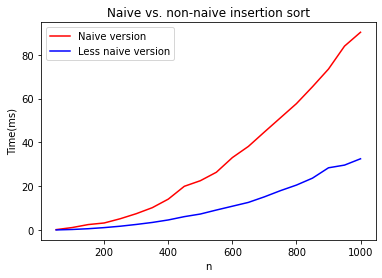

In [9]:
plt.plot(nValuesNaive, tValuesNaive, color="red", label="Naive version")
plt.plot(nValues, tValues, color="blue", label="Less naive version")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Naive vs. non-naive insertion sort")


Well, that does agree with our intuition that the naive version should take longer. 

But, naive or not, InsertionSort's performance is quadratic with the size of the input. 